In [ ]:
# Here are the questions that I aim to answer from this data analysis:
# 1. Can I use features such as life expectancy, internet usage percentage, and primary education duration to accurately predict GDP per capita?
# 2. Which features have the strongest correlation with GDP per capita?
# 3. Can I predict the country based on the other features?

In [118]:
# Import the GDP Data Set

import pandas as pd

gdp_data = pd.read_csv('GDPData.csv')

#This data is in the wrong format for our analysis, so we need to reshape it.
gdp_df = gdp_data.melt(id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'],
                          var_name='Year', value_name='Value')

# Change the year to only 4 digit number
gdp_df['Year'] = gdp_df['Year'].str[0:4].astype(int)

# Replace '..' with 0 before converting to numeric
gdp_df['Value'] = gdp_df['Value'].replace('..', 0)

#Convert the Value column to numeric
gdp_df['Value'] = pd.to_numeric(gdp_df['Value'], errors='coerce').fillna(0)

# Reshape the DataFrame to have one row per country and year
gdp_df = gdp_df.pivot_table(index=['Country Name', 'Country Code', 'Year'],
                             columns='Series Name',
                             values='Value').reset_index()

# Rename the columns and remove the Series Name
gdp_df = gdp_df.rename(columns={
    "GDP per capita (current US$)": "gdp_per_capita($)",
    "Life expectancy at birth, total (years)": "life_expectancy(years)",
    "Individuals using the Internet (% of population)": "internet_users(%)",
    "Unemployment, total (% of total labor force) (modeled ILO estimate)": "unemployment_rate(%)",
    "Primary education, duration (years)": "primary_education_duration(years)"
})
gdp_df.columns.name = None
print(gdp_df.head())



  Country Name Country Code  Year  gdp_per_capita($)  internet_users(%)  \
0    Australia          AUS  2012       68072.873234               79.0   
1    Australia          AUS  2013       68190.701004               83.5   
2    Australia          AUS  2014       62544.087377               84.0   
3    Australia          AUS  2015       56739.026535               84.6   
4    Australia          AUS  2016       49888.041084               86.5   

   life_expectancy(years)  primary_education_duration(years)  \
0               82.046341                                7.0   
1               82.148780                                7.0   
2               82.300000                                7.0   
3               82.400000                                7.0   
4               82.448780                                7.0   

   unemployment_rate(%)  
0                 5.225  
1                 5.663  
2                 6.078  
3                 6.055  
4                 5.711  


In [119]:
# The data that I brought in from the world bank databank website was in a wide csv format instead of a long format like I wanted.
# So the first step I wanted to do was research how to reshape the data. I found the melt function in pandas which allows me to 
# reshape the data from wide to long format so I could change the year to become a feature variable and have specific years 
# be values instead of column headers. This reshaped the dataframe to have a year column with the year and a value column with 
# a specific value of a feature variable like GDP, unemployment rate, etc. After this step, the next thing I noticed 
# through my exploratory data analysis was that year values were not in a numerical format, so I changed them to be 4 digit 
# integer values. Next thing I realized was that after melting the data I had to call the pivot_table function to ensure that
# the feature variables listed under series name would become column headers and each row would be for a unique country and year.
# After this step, I noticed it was failing due to some values being of object type instead of numeric, and found that one of
# the values was '..' and not a number. I replaced this value with 0 since through research I found Nan were not supported
# for some models and then converted the value column to numeric. Now I had successfully reshaped the data to have
# a row for each country and year with the feature variables as column headers. The last thing I decided to do was 
# rename the columns and shorten them for ease. Now that the data is formatted correctly and I got rid of bad values I plan
# on visualizing the data and determine based off that what ML model to use.


In [120]:
# Lets start by finding out more about the data frame I have

gdp_df.shape

# Looks like there are 187 rows of data with 8 columns

(187, 8)

In [121]:
# Lets call the describe function to get a summary of the data
gdp_df.describe()

,Year,gdp_per_capita($),internet_users(%),life_expectancy(years),primary_education_duration(years),unemployment_rate(%)
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,2017.000000,31453.264389,72.341711,77.905984,5.925134,8.469267
std,3.170767,23767.624346,22.888370,5.826105,0.581765,7.187041
min,2012.000000,1429.321995,0.000000,61.737000,4.000000,1.640000
25%,2014.000000,8390.972040,58.300000,74.169500,6.000000,4.372500
50%,2017.000000,29786.524569,78.600000,80.647317,6.000000,5.600000
75%,2020.000000,46207.930376,90.550000,82.474500,6.000000,8.062000
max,2022.000000,94394.510680,100.000000,84.560000,7.000000,34.007000


In [122]:
#Lets make sure all the data types are correct
gdp_df.dtypes

Country Name                          object
Country Code                          object
Year                                   int64
gdp_per_capita($)                    float64
internet_users(%)                    float64
life_expectancy(years)               float64
primary_education_duration(years)    float64
unemployment_rate(%)                 float64
dtype: object

In [123]:
# Lets check to see if there are any null values
gdp_df.isnull().sum()

Country Name                         0
Country Code                         0
Year                                 0
gdp_per_capita($)                    0
internet_users(%)                    0
life_expectancy(years)               0
primary_education_duration(years)    0
unemployment_rate(%)                 0
dtype: int64

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'gdp_per_capita($)'}>],
       [<Axes: title={'center': 'internet_users(%)'}>,
        <Axes: title={'center': 'life_expectancy(years)'}>],
       [<Axes: title={'center': 'primary_education_duration(years)'}>,
        <Axes: title={'center': 'unemployment_rate(%)'}>]], dtype=object)

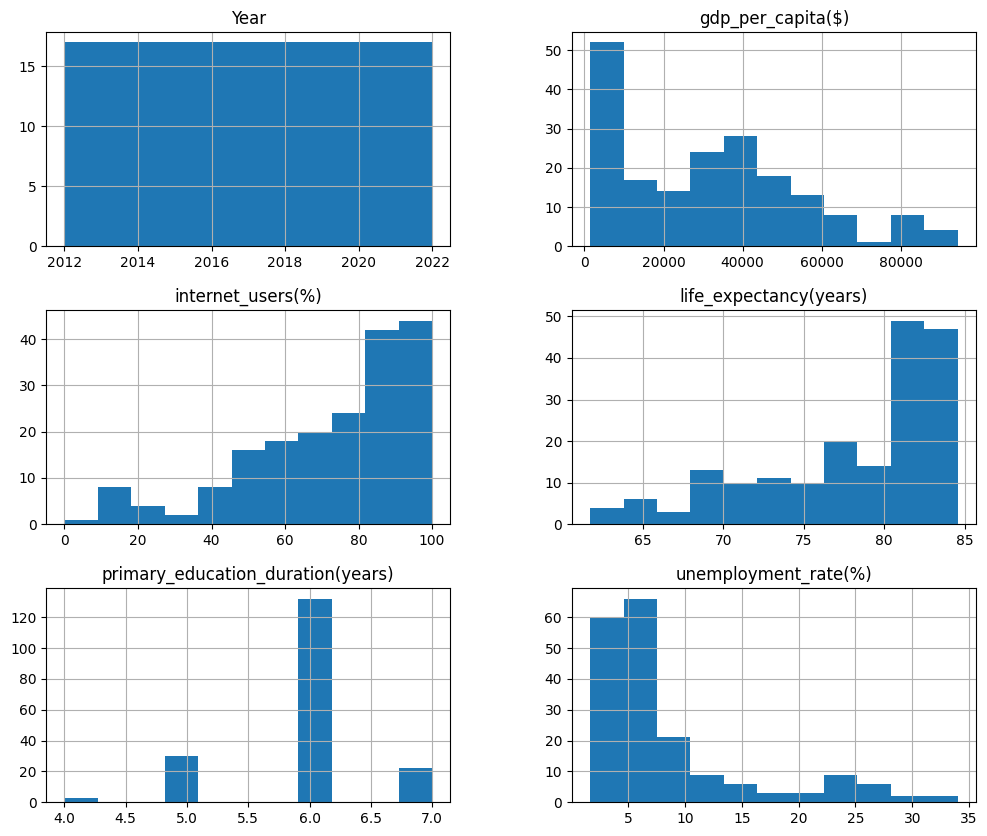

In [124]:
import matplotlib.pyplot as plt
gdp_df.hist(bins=11, figsize=(12, 10))

In [125]:
# This histogram does a great job of giving us some insight into the data. I can see that GDP per capita is skewed to the right,
# which shows most countries have a lower GDP per capita, while a few countries have a very high GDP per capita.
# The internet usage % is skewed left showing that most countries have a high internet usage %, The same can be 
# said for life expectancy, which is also skewed left. Primary education is the most unique out of all the features
# as it is fairly unifrom with most countries having close to either 5, 6, or 7 years of primary education. This makes sense because education is measured in whole years, so
# the averages will be close to whole numbers. Unemployment rate is also skewed right, showing that most countries have a low unemployment rate mostly below 10 percent.

In [126]:
# Now lets calculate a correlation matrix to see how the features contribute to a countries GDP

In [127]:
# Drop non numeric columns for correlation analysis
numeric_gdp_df = gdp_df.drop(columns=['Country Name', 'Country Code'])

corr_matrix = numeric_gdp_df.corr()
corr_matrix

,Year,gdp_per_capita($),internet_users(%),life_expectancy(years),primary_education_duration(years),unemployment_rate(%)
Year,1.000000,0.022047,0.371532,0.015141,-0.034975,-0.092761
gdp_per_capita($),0.022047,1.000000,0.695414,0.703370,0.052066,-0.290799
internet_users(%),0.371532,0.695414,1.000000,0.684847,0.139251,-0.138744
life_expectancy(years),0.015141,0.703370,0.684847,1.000000,-0.175744,-0.266479
primary_education_duration(years),-0.034975,0.052066,0.139251,-0.175744,1.000000,0.320511
unemployment_rate(%),-0.092761,-0.290799,-0.138744,-0.266479,0.320511,1.000000


In [128]:
# Upon analyzing the correlation matrix, I can see that GDP per capita has a strong positive correlation with life expectancy and internet usage percentage.
# This is expected but surprising to see that primary education duration has a very weak correlation with GDP, as I expected that to play a larger role in GDP.

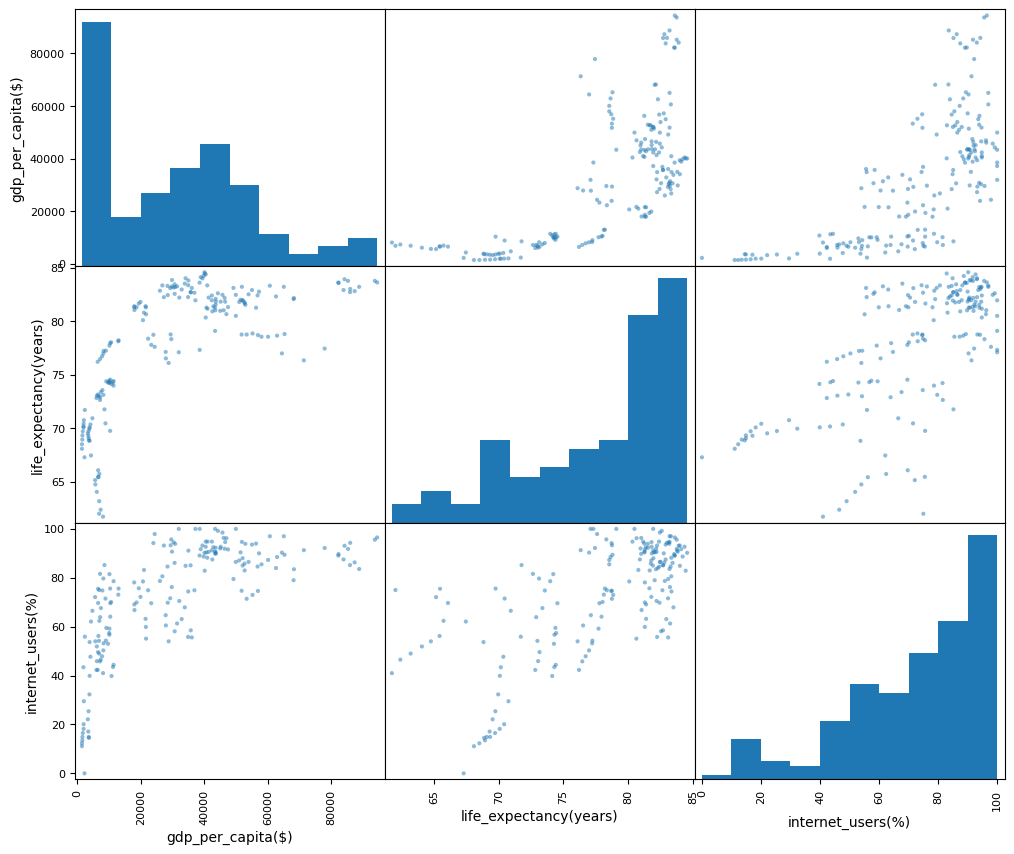

In [129]:
# Lets plot the two features that have the strongest correlation with GDP per capita

from pandas.plotting import scatter_matrix

features = ['gdp_per_capita($)', 'life_expectancy(years)', 'internet_users(%)']
scatter_matrix(gdp_df[features], figsize=(12, 10))

plt.show()

In [130]:
# These results echo the results we saw in the correlation matrix, showing that GDP per capita has a strong positive correlation with life expectancy and internet usage percentage.

In [131]:
# Now that the data is cleaned and I have some initial insights into the data, I can select a machine learning model. I have decided to use a linear regression model to predict GDP 
# based on the other features.

In [132]:
# Split the data into features and target variable
X = numeric_gdp_df.drop(columns=['gdp_per_capita($)'])
y = numeric_gdp_df['gdp_per_capita($)']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)


LinearRegression()

In [133]:
# Now I want to make predictions on the test set to evaluate the model
y_pred = linear_model.predict(X_test)

# Calculate the r^2 score to evaluate the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Calculate the mean squared error and root mean squared error to evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)



R2 Score: 0.60362749606903
Mean Squared Error: 232278582.5746639
Root Mean Squared Error: 15240.688389133344


In [135]:
# I calculated the r2 score along with the mean squared error and root mean squared error to evaluate the model. 
# The r2 score tells us that the model does not perform very well as it is close to .60, telling us around 60 percent of the variance in GDP can 
# be explained by the other features. The mean squared error and root mean squared error also show that the model doesn't perform very well, telling us the average error of the 
# prediction is around 15,240 which is a large number when looking at the GDP values.

In [136]:
# Now lets imagine I want to predict the country based on the other features, I can do this by using a classification model.

X_classification = gdp_df.drop(columns=['Country Name', 'Country Code'])
y_classification = gdp_df['Country Name']

# Split the data into training and testing sets
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

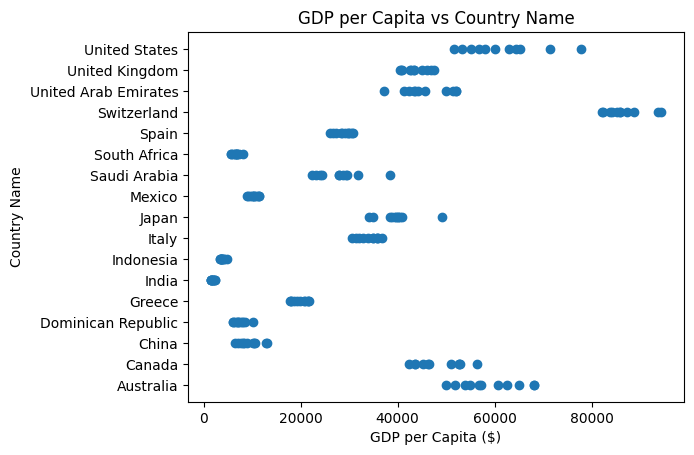

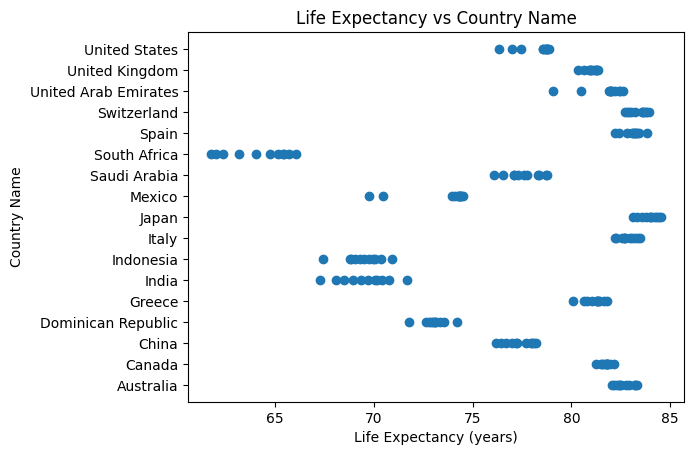

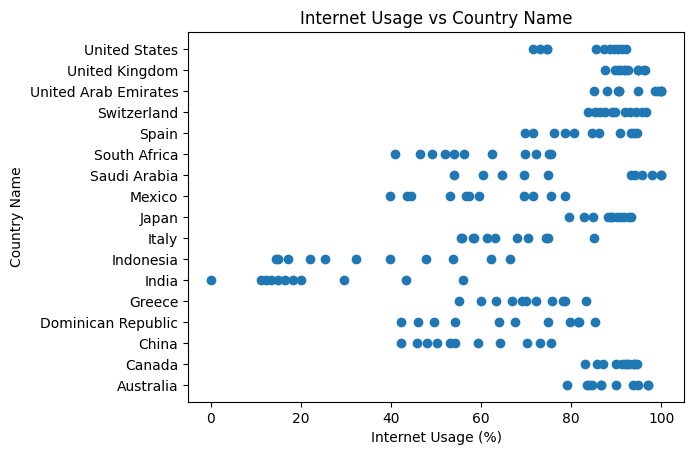

In [137]:
# I want to plot a scatter plot for a few features against the country name to see if there are any patterns that can be used to classify the countries

#Scatter plot of GDP per capita vs Country Name
import matplotlib.pyplot as plt
plt.scatter(data=gdp_df, x='gdp_per_capita($)', y='Country Name')
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Country Name')
plt.title('GDP per Capita vs Country Name')
plt.show()

# Scatter plot of life expectancy vs Country Name
plt.scatter(data=gdp_df, x='life_expectancy(years)', y='Country Name')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Country Name')
plt.title('Life Expectancy vs Country Name')
plt.show()

# Scatter plot of internet usage vs Country Name
plt.scatter(data=gdp_df, x='internet_users(%)', y='Country Name')
plt.xlabel('Internet Usage (%)')
plt.ylabel('Country Name')
plt.title('Internet Usage vs Country Name')
plt.show()




In [ ]:
# From these scatter plots, I can see that there are no clear patterns that can be used to classify the countries based on the features. This leads me to predict
# that a classification model will not perform well on this dataset.

In [138]:
# I was deciding between a decision tree classifier or a random forest classifier, but I decided to go with a decision tree classifier since the dataset I am working with
# is relatively small and the linear regression model did not show many signs of overfitting. The decision tree classifier also has higher interpretability.

from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(max_depth = 3,random_state=42)

decision_tree_model.fit(X_train_classification, y_train_classification)


DecisionTreeClassifier(max_depth=3, random_state=42)

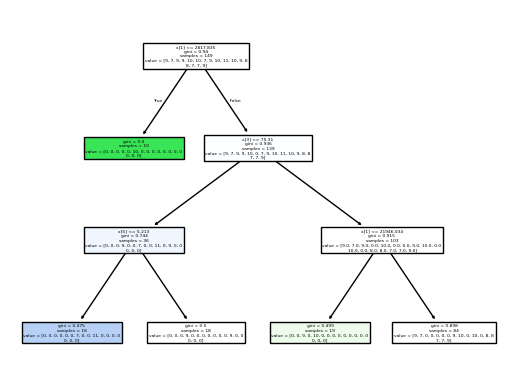

In [139]:
# Lets take a look at the decision tree model
from sklearn.tree import plot_tree
plot_tree(decision_tree_model, filled=True)
plt.show()

In [140]:
# Lets now make predictions on the test and trainining set
y_pred_classification = decision_tree_model.predict(X_test_classification)

In [141]:
# Since it is a classification model, I can evaluate the model using accuracy, f1 score, recall, and precision

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

accuracy = accuracy_score(y_test_classification, y_pred_classification)
print("Accuracy:", accuracy)

recall_score = recall_score(y_test_classification, y_pred_classification, average = 'micro')
print("Recall Score:", recall_score)

precision_score = precision_score(y_test_classification, y_pred_classification, average = 'micro')
print("Precision Score:", precision_score)

f1_score = f1_score(y_test_classification, y_pred_classification, average = 'micro')
print("F1 Score:", f1_score)



Accuracy: 0.13157894736842105
Recall Score: 0.13157894736842105
Precision Score: 0.13157894736842105
F1 Score: 0.13157894736842105


In [142]:
# These evalution scores show that the model performs very very poorly, with all the scores being very low, only around .13. 
# Accuracy tells us the correct predictions divided by the total number of predictions.
# Recall score tells us the correct predicted positives divided by the total actual positives while Precision score tells us the correct predicted positives 
# divided by the total predicted positives.
# Finally, the f1 score is the harmonic mean of precision and recall.
# This tells us that our model is not able to accurately predict the country based on the other features. 
# This is expected as the dataset is failry small and the features do not have a strong correlation with the country name.
# The scores support the prediction that I made earlier. 
